In [76]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import script.data as data
import script.bsutil as bsutil
import talib
from script.figure import draw

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [68]:
df = bsutil.get_price_daily(code='sh.600320')

login success!
logout success!


In [8]:
import finplot as fplt

In [33]:
df[['open', 'close', 'high', 'low']] = df[['open', 'close', 'high', 'low']].astype('float32')

In [62]:
df['sma'] = talib.SMA(df.close, 200)
df = df.iloc[-260:]

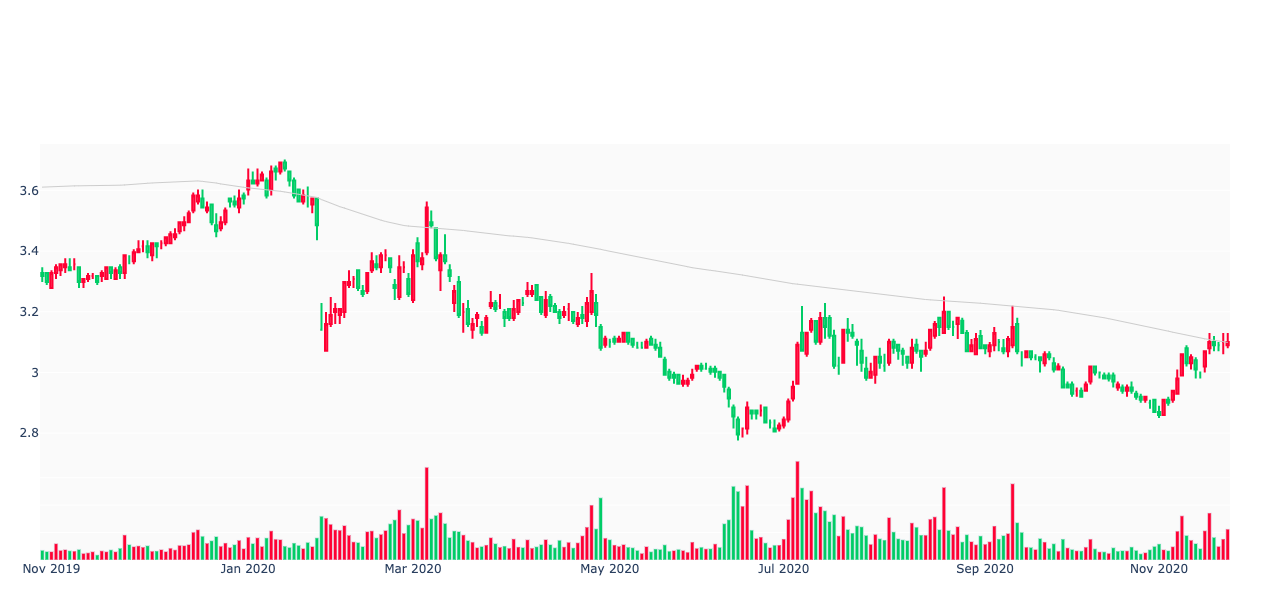

In [66]:
INCREASING_COLOR = '#FF0033'
DECREASING_COLOR = '#00CC66'
data = [dict(
    type = 'candlestick',
    open = df.open,
    high = df.high,
    low = df.low,
    close = df.close,
    x = df.date,
    yaxis = 'y2',
    name = 'GS',increasing = dict( line = dict( color = INCREASING_COLOR ) ),
    decreasing = dict( line = dict( color = DECREASING_COLOR ) ),)]

layout=dict()

fig = dict(data=data, layout=layout)
fig['layout'] = dict()
fig['layout']['plot_bgcolor'] = 'rgb(250, 250, 250)'
# fig['layout']['xaxis'] = {}
fig['layout']['yaxis'] = dict( domain = [0, 0.2], showticklabels = False )
fig['layout']['yaxis2'] = dict( domain = [0.2, 0.8] )
fig['layout']['legend'] = dict( orientation = 'h', y=0.9, x=0.3, yanchor='bottom' )
fig['layout']['margin'] = dict( t=40, b=40, r=40, l=40 )
fig['layout']['height'] = 600

colors = []

for i in range(len(df.close)):
    if i != 0:
        if df.close.iloc[i] >= df.close.iloc[i-1]:
            colors.append(INCREASING_COLOR)
        else:
            colors.append(DECREASING_COLOR)
    else:
        colors.append(DECREASING_COLOR)

fig['data'].append( dict( x=df.date, y=df.volume,                         
                         marker=dict( color=colors ),
                         type='bar', yaxis='y', name='Volume' ))

fig['data'].append( dict( x=df.date, y=df.sma, type='scatter', yaxis='y2', 
                         line = dict( width = 1 ),
                         marker=dict(color='#ccc'), hoverinfo='none' ))


fig = go.Figure(fig)
fig.update_xaxes(rangebreaks=[dict(values=dt_breaks)])
fig.update(layout_xaxis_rangeslider_visible=False)
fig.update_layout(showlegend=False)
fig.show()

In [25]:
# build complete timepline from start date to end date
dt_all = pd.date_range(start=df['date'].iloc[0],end=df['date'].iloc[-1])
# retrieve the dates that ARE in the original datset
dt_obs = [d.strftime("%Y-%m-%d") for d in pd.to_datetime(df['date'])]
# define dates with missing values
dt_breaks = [d for d in dt_all.strftime("%Y-%m-%d").tolist() if not d in dt_obs]

In [64]:
df

,date,open,high,low,close,volume,sma
2386,2019-10-30,3.3273531200,3.3470416000,3.2978204000,3.3175088800,3562791,3.610679
2387,2019-10-31,3.3273531200,3.3273531200,3.2879761600,3.2978204000,3117705,3.611624
2388,2019-11-01,3.2781319200,3.3371973600,3.2781319200,3.3273531200,3052632,3.612473
2389,2019-11-04,3.3273531200,3.3568858400,3.3076646400,3.3470416000,5987634,3.613226
2390,2019-11-05,3.3371973600,3.3568858400,3.3175088800,3.3568858400,3546873,3.613689
...,...,...,...,...,...,...,...
2641,2020-11-17,3.0800000000,3.1300000000,3.0600000000,3.1000000000,17127896,3.108463
2642,2020-11-18,3.1000000000,3.1200000000,3.0700000000,3.0900000000,8272703,3.106095
2643,2020-11-19,3.0900000000,3.1000000000,3.0700000000,3.0900000000,4990274,3.103628
2644,2020-11-20,3.1000000000,3.1300000000,3.0600000000,3.1000000000,7645696,3.101261


In [67]:
len(df)

260

In [29]:
data1 = pd.read_csv('/Users/yuzifeng/GitHub/stock/data/isq/isq.csv', dtype={'ticker': str})
data2 = pd.read_csv('/Users/yuzifeng/GitHub/stock/data/isq/isq-20070331-20200930.csv', dtype={'ticker': str})

In [60]:
sma200[-260:]

2386         NaN
2387         NaN
2388         NaN
2389         NaN
2390         NaN
          ...   
2641    3.108463
2642    3.106095
2643    3.103628
2644    3.101261
2645    3.098894
Length: 260, dtype: float64

In [19]:
data2.iloc[0]

secID                         000001.XSHE
publishDate                    2020-02-14
endDate                        2019-12-31
endDateRep                     2019-12-31
partyID                                 2
ticker                             000001
secShortName                         平安银行
exchangeCD                           XSHE
actPubtime            2020-02-13 19:02:36
mergedFlag                              1
reportType                              A
fiscalPeriod                           12
accoutingStandards              CHAS_2007
currencyCD                            CNY
tRevenue                      1.37958e+11
revenue                       1.37958e+11
intIncome                      8.9961e+10
intExp                                NaN
premEarned                            NaN
commisIncome                   3.6743e+10
commisExp                             NaN
TCogs                         1.01669e+11
COGS                          1.01669e+11
premRefund                        

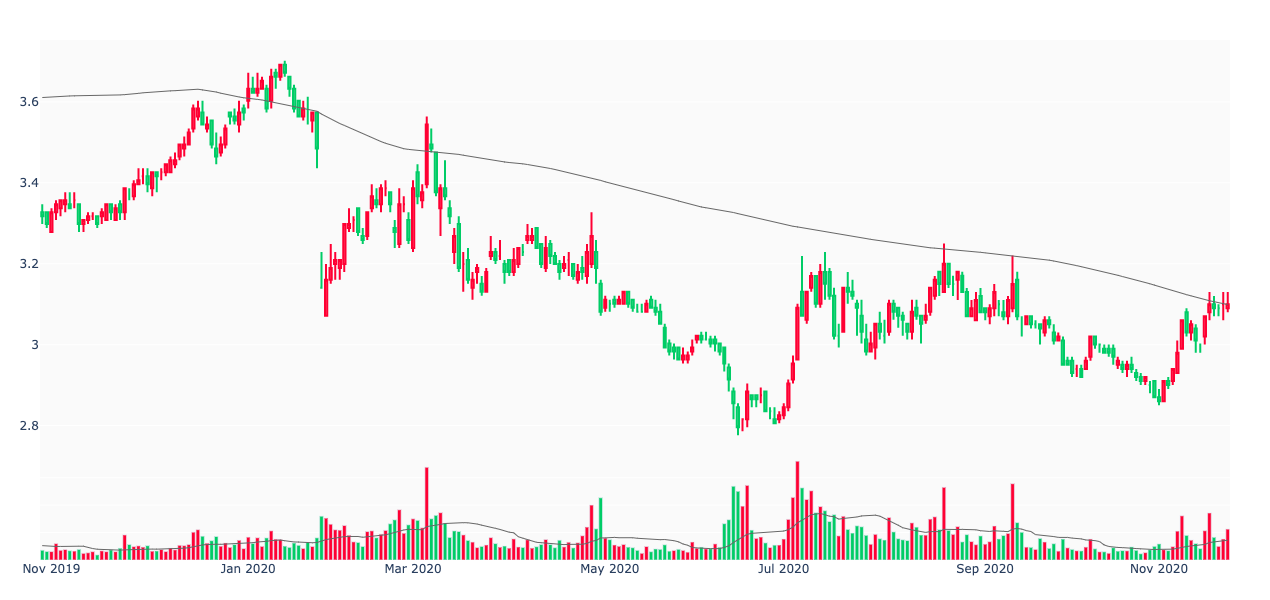

In [80]:
draw(df, 260, 200, 20)